# All Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

### Load and Preprocess the data for Training

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test)

## Model Creation and Development
#### I have to try different hyperparameters that yielded at best a good prediction thus settling on these values

In [3]:
rf_regressor = RandomForestRegressor(n_estimators = 1000, max_depth= 500, random_state = 42)
rf_regressor.fit(X_train_normalized, y_train_normalized)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=500, n_estimators=1000, random_state=42)

### Get feature importances from the trained model

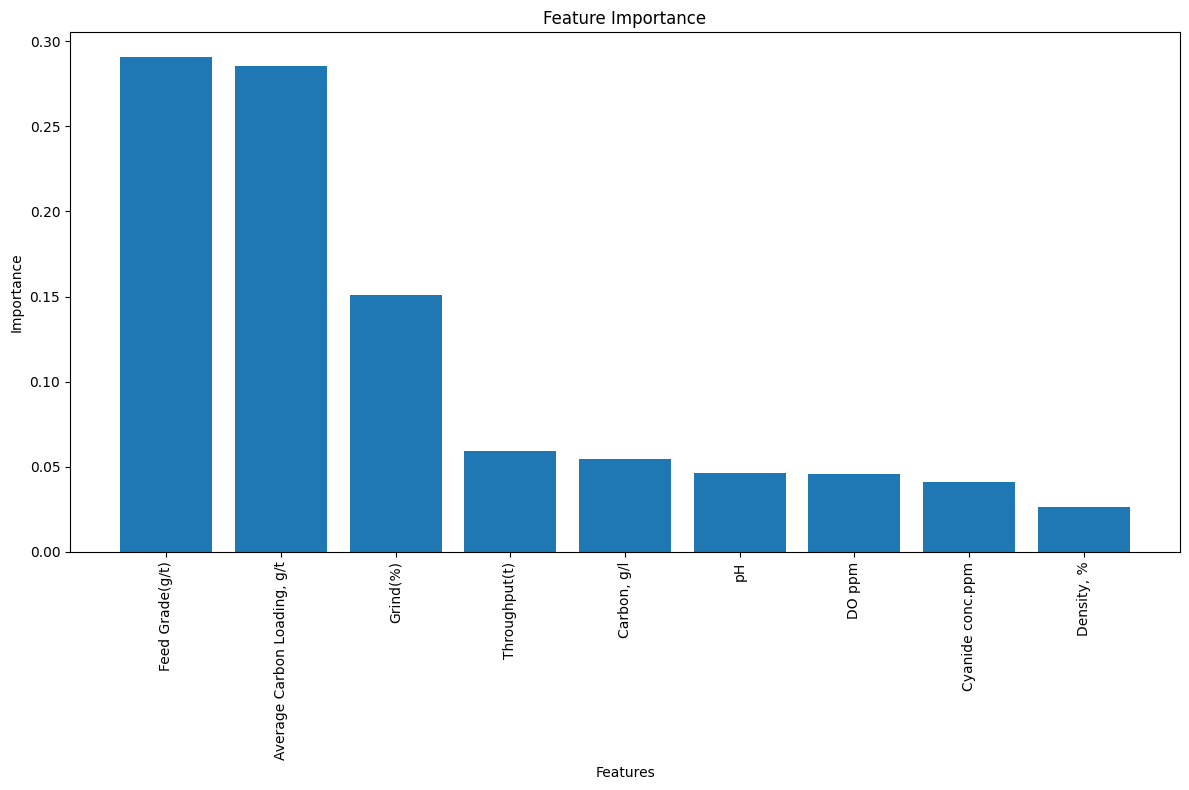

In [4]:
# Get feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), sorted_feature_importances)
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Model Performance Using the Training Set

In [5]:
y_train_pred = rf_regressor.predict(X_train_normalized)
y_train_pred = scaler_Y.inverse_transform(y_train_pred.reshape(-1,1))


# Calculate training performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
r_value_train = np.sqrt(r2_train)


print(f"Training RMSE: {rmse_train:.4f}")
print(f"Training MAPE: {mape_train:.4f}")
print(f"Training R-squared (R²): {r2_train:.4f}")
print(f"Training R-value (R): {r_value_train:.4f}")

Training RMSE: 0.3117
Training MAPE: 0.0028
Training R-squared (R²): 0.9308
Training R-value (R): 0.9648


## Model Performance Using the Test Set

#### Performance metrics not promising at all :(

In [6]:
y_pred_scaled = rf_regressor.predict(X_test_normalized)
y_test_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1,1))


rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
r_value__test = np.sqrt(r2_test)


# Print the metrics
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAPE: {mape_test:.4f}")
print(f"Test R-squared (R²): {r2_test:.4f}")
print(f"Test R-value (R): {r_value__test:.4f}")

Test RMSE: 0.7989
Test MAPE: 0.0067
Test R-squared (R²): 0.3119
Test R-value (R): 0.5585


### Random Forest is an ensemble of plenty decision trees thus the tree below:

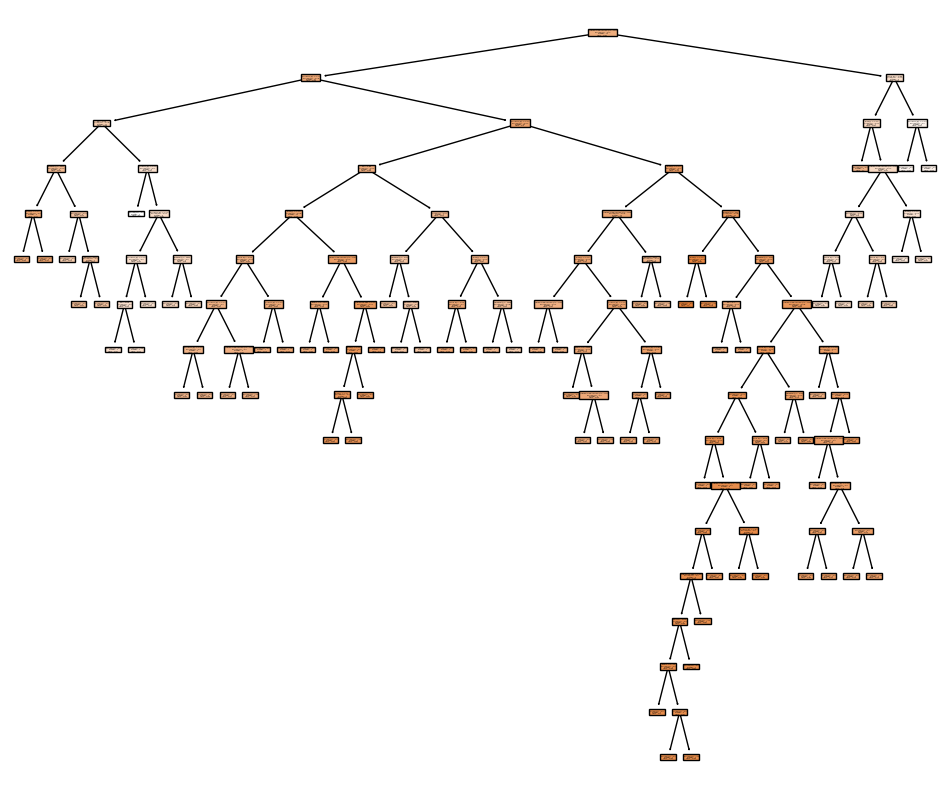

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree from the Random Forest
tree = rf_regressor.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(12, 10))
plot_tree(tree, feature_names=list(X_train.columns), filled=True)
plt.show()

## Compare Predicted values to the Actual values using the trained model

In [8]:
compare_train_df = pd.DataFrame(y_train_pred, columns=['Predicted_Train_value'])
compare_train_df['Actual_Train_value'] = y_train

In [9]:
compare_test_df = pd.DataFrame(y_test_pred, columns=['Predicted_Test_value'])
compare_test_df['Actual_Test_value'] = y_test

In [10]:
compare_train_df.head(10)

,Predicted_Train_value,Actual_Train_value
0,88.425445,87.961187
1,88.972014,88.565905
2,90.667015,90.986610
3,91.398507,91.640657
4,90.933318,91.081881
5,90.197080,89.832310
6,91.283488,91.594430
7,90.709998,90.492627
8,91.160358,91.337506
9,90.608590,90.651737


In [11]:
compare_test_df.head(10)

,Predicted_Test_value,Actual_Test_value
0,90.748614,89.959033
1,90.334749,90.590392
2,90.203208,88.761667
3,89.739661,90.777612
4,90.379583,90.116769
5,90.472148,90.428091
6,90.434670,91.709526
7,89.453536,89.376526
8,90.992580,90.828132
9,90.529480,90.003263


### Prediction and Actual Values Plot for the Training Set

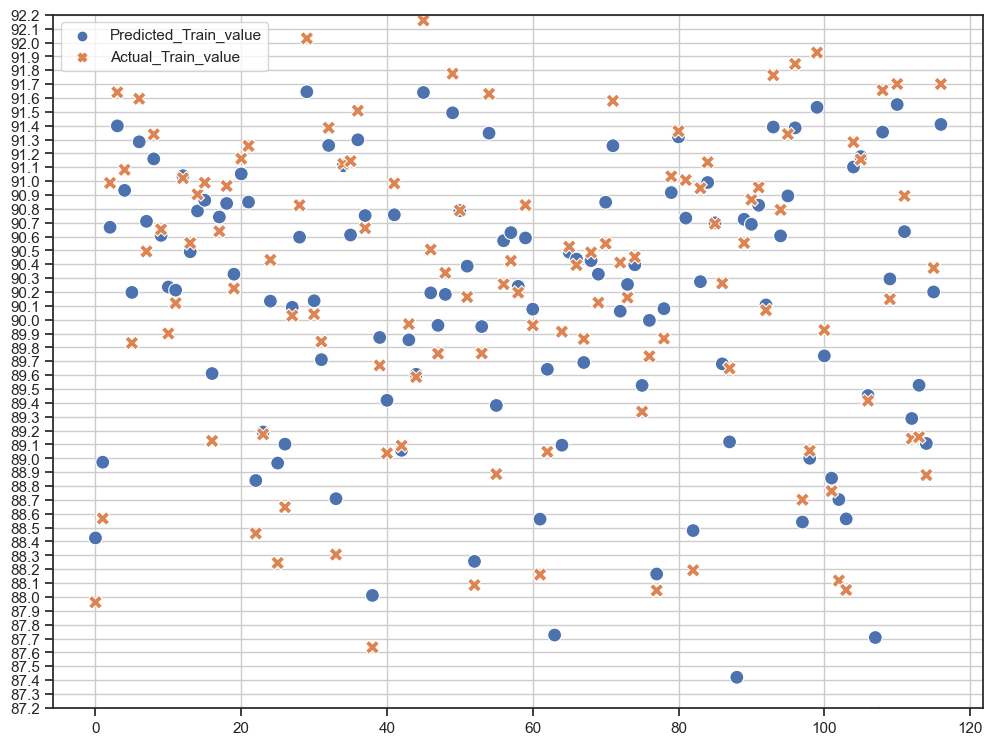

In [12]:
plt.figure(figsize=(12,9))
sns.set(style = 'ticks')

sns.scatterplot(compare_train_df, s=100)
y_ticks = np.arange(87.2, 92.3, 0.1)
plt.ylim(87.2, 92.2)
plt.yticks(y_ticks)
plt.grid(True)

### Prediction and Actual Value Plot for the Test Set

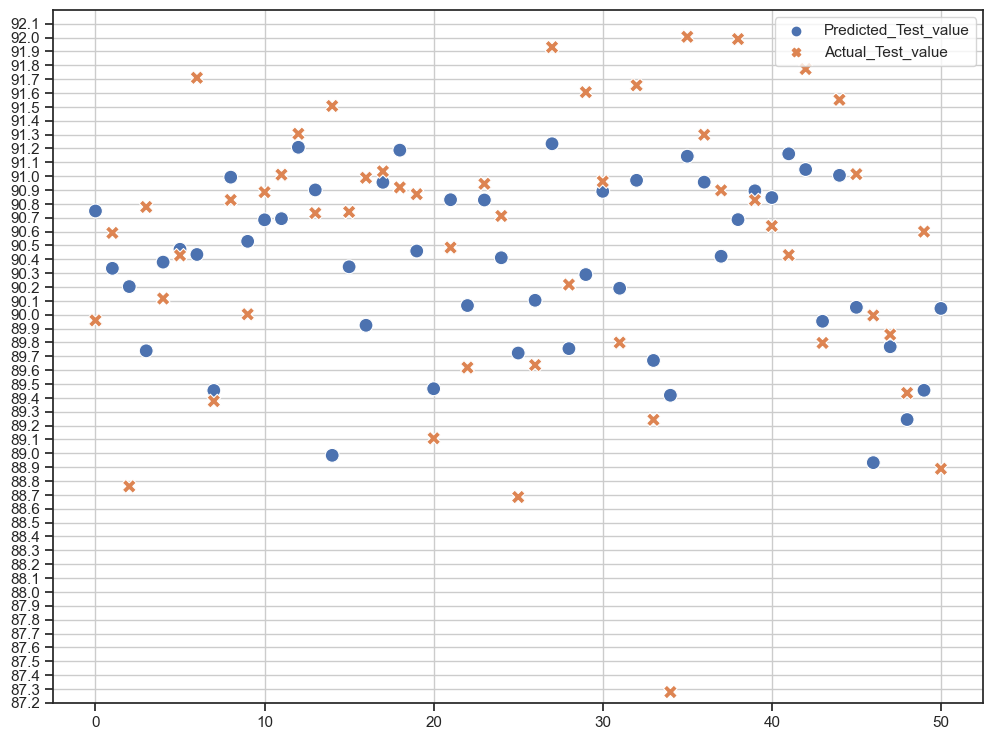

In [13]:
plt.figure(figsize=(12,9))
sns.set(style = 'ticks')

sns.scatterplot(compare_test_df, s=100)
y_ticks = np.arange(87.2, 92.2, 0.1)
plt.ylim(87.2, 92.2)
plt.yticks(y_ticks)
plt.grid(True)